# Assignment 1: Data Wrangling & Visualizations

### Author: Lei Cao
### Date: January 23, 2020

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

In [4]:
# Q1: Opening Data, Merging Data (10 points)
## Read in the list of towns (#1) and Real Estate Sales (#2) datasets.
df1 = pd.read_csv('/content/drive/My Drive/5512 Spring 2020/Assignment/Assignment 1/List_of_Towns.csv')
df1

,Number,Town,Designation,Established Year,Land area (square miles),Population (in 2010),County
0,1,Andover,Town,1848,15.46,"3,303",Tolland County
1,2,Ansonia,City,1889,6.03,"19,249",New Haven County
2,3,Ashford,Town,1714,38.79,"4,100",Windham County
3,4,Avon,Town,1830,23.12,"18,098",Hartford County
4,5,Barkhamsted,Town,1779,36.22,"3,620",Litchfield County
...,...,...,...,...,...,...,...
164,165,Windsor Locks,Town,1854,9.03,"12,498",Hartford County
165,166,Wolcott,Town,1796,20.43,"16,680",New Haven County
166,167,Woodbridge,Town,1784,18.83,"8,990",New Haven County
167,168,Woodbury,Town,1673,36.47,"9,975",Litchfield County


In [5]:
df2 = pd.read_csv('/content/drive/My Drive/5512 Spring 2020/Assignment/Assignment 1/Real_Estate_Sales_2014-2016.csv')
df2

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,1,14046,2014,9/29/2015,Andover,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...,...
145982,145983,140012,2014,10/31/2014,Woodstock,TAYLER TRAIL,42600,32500.0,1.310769,Vacant Land,NaN
145983,145984,150056,2015,1/28/2016,Woodstock,TAYLER TRAIL,40700,37000.0,1.100000,Vacant Land,NaN
145984,145985,150057,2015,1/28/2016,Woodstock,TAYLER TRAIL,33900,15000.0,2.260000,Vacant Land,NaN
145985,145986,140146,2014,9/21/2015,Woodstock,WOODLAND DR,42000,5000.0,8.400000,Vacant Land,NaN


In [6]:
## Merge the entire two datasets.
mer = pd.merge(df1, df2, on='Town', how='outer')
mer

,Number,Town,Designation,Established Year,Land area (square miles),Population (in 2010),County,ID,SerialNumber,ListYear,DateRecorded,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,1,Andover,Town,1848,15.46,"3,303",Tolland County,1,14046,2014,9/29/2015,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN
1,1,Andover,Town,1848,15.46,"3,303",Tolland County,2,14011,2014,1/14/2015,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,1,Andover,Town,1848,15.46,"3,303",Tolland County,3,15006,2015,11/30/2015,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,1,Andover,Town,1848,15.46,"3,303",Tolland County,4,14044,2014,9/28/2015,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,1,Andover,Town,1848,15.46,"3,303",Tolland County,5,14035,2014,8/10/2015,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145982,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145983,140012,2014,10/31/2014,TAYLER TRAIL,42600,32500.0,1.310769,Vacant Land,NaN
145983,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145984,150056,2015,1/28/2016,TAYLER TRAIL,40700,37000.0,1.100000,Vacant Land,NaN
145984,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145985,150057,2015,1/28/2016,TAYLER TRAIL,33900,15000.0,2.260000,Vacant Land,NaN
145985,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145986,140146,2014,9/21/2015,WOODLAND DR,42000,5000.0,8.400000,Vacant Land,NaN


In [7]:
# Q2: Filtering out missing data (5 points)
## Identify the columns with missing values.
mer.columns[mer.isnull().any()]

Index(['DateRecorded', 'Address', 'SaleAmount', 'ResidentialType'], dtype='object')

In [8]:
## It’s often helpful to make a subset of the data that you need to clean.
mis = mer[['DateRecorded', 'Address', 'SaleAmount', 'ResidentialType']]
mis

,DateRecorded,Address,SaleAmount,ResidentialType
0,9/29/2015,US ROUTE 6 M 33 B 36 L 22,75000.0,NaN
1,1/14/2015,1 JUROVATY LANE,190000.0,Single Family
2,11/30/2015,1 ROSE LANE,50000.0,Single Family
3,9/28/2015,10 PINE RIDGE DR,128368.0,Single Family
4,8/10/2015,101 WALES RD,230000.0,Single Family
...,...,...,...,...
145982,10/31/2014,TAYLER TRAIL,32500.0,NaN
145983,1/28/2016,TAYLER TRAIL,37000.0,NaN
145984,1/28/2016,TAYLER TRAIL,15000.0,NaN
145985,9/21/2015,WOODLAND DR,5000.0,NaN


In [9]:
# Q3: Replacing missing data (10 points)
## Replace missing date recorded data with the corresponding year in ListYear column.
mis.loc[mis['DateRecorded'].isnull(), 'DateRecorded'] = '1/1/2014'
mis

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,DateRecorded,Address,SaleAmount,ResidentialType
0,9/29/2015,US ROUTE 6 M 33 B 36 L 22,75000.0,NaN
1,1/14/2015,1 JUROVATY LANE,190000.0,Single Family
2,11/30/2015,1 ROSE LANE,50000.0,Single Family
3,9/28/2015,10 PINE RIDGE DR,128368.0,Single Family
4,8/10/2015,101 WALES RD,230000.0,Single Family
...,...,...,...,...
145982,10/31/2014,TAYLER TRAIL,32500.0,NaN
145983,1/28/2016,TAYLER TRAIL,37000.0,NaN
145984,1/28/2016,TAYLER TRAIL,15000.0,NaN
145985,9/21/2015,WOODLAND DR,5000.0,NaN


In [10]:
## Replace missing Sales Amount data with the corresponding Assessed Value Column.
mis.loc[mis['SaleAmount'].isnull(), 'SaleAmount'] = mer['AssessedValue']
mis

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,DateRecorded,Address,SaleAmount,ResidentialType
0,9/29/2015,US ROUTE 6 M 33 B 36 L 22,75000.0,NaN
1,1/14/2015,1 JUROVATY LANE,190000.0,Single Family
2,11/30/2015,1 ROSE LANE,50000.0,Single Family
3,9/28/2015,10 PINE RIDGE DR,128368.0,Single Family
4,8/10/2015,101 WALES RD,230000.0,Single Family
...,...,...,...,...
145982,10/31/2014,TAYLER TRAIL,32500.0,NaN
145983,1/28/2016,TAYLER TRAIL,37000.0,NaN
145984,1/28/2016,TAYLER TRAIL,15000.0,NaN
145985,9/21/2015,WOODLAND DR,5000.0,NaN


In [11]:
## Add this subset back to the dataset
mer['DateRecorded'] = mis['DateRecorded']
mer['SaleAmount'] = mis['SaleAmount']
mer

,Number,Town,Designation,Established Year,Land area (square miles),Population (in 2010),County,ID,SerialNumber,ListYear,DateRecorded,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,1,Andover,Town,1848,15.46,"3,303",Tolland County,1,14046,2014,9/29/2015,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN
1,1,Andover,Town,1848,15.46,"3,303",Tolland County,2,14011,2014,1/14/2015,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,1,Andover,Town,1848,15.46,"3,303",Tolland County,3,15006,2015,11/30/2015,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,1,Andover,Town,1848,15.46,"3,303",Tolland County,4,14044,2014,9/28/2015,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,1,Andover,Town,1848,15.46,"3,303",Tolland County,5,14035,2014,8/10/2015,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145982,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145983,140012,2014,10/31/2014,TAYLER TRAIL,42600,32500.0,1.310769,Vacant Land,NaN
145983,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145984,150056,2015,1/28/2016,TAYLER TRAIL,40700,37000.0,1.100000,Vacant Land,NaN
145984,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145985,150057,2015,1/28/2016,TAYLER TRAIL,33900,15000.0,2.260000,Vacant Land,NaN
145985,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145986,140146,2014,9/21/2015,WOODLAND DR,42000,5000.0,8.400000,Vacant Land,NaN


In [12]:
# Q4: Binning (10 points)
## Make a column “Property Value” based on Column AssessedValue given the conditions:
## 'LowRange' if Assessed Value <=300,000
## 'MidRange' if Assessed Value >300,000 and <=800,000
## 'HighRange' if Assessed Value >800,000
bins = [-1, 300000, 800000, 138958820]
labels = ['LowRange', 'MidRange', 'HighRange']
mer['Property Value'] = pd.cut(mer['AssessedValue'], bins=bins, labels=labels)
mer

,Number,Town,Designation,Established Year,Land area (square miles),Population (in 2010),County,ID,SerialNumber,ListYear,DateRecorded,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,Property Value
0,1,Andover,Town,1848,15.46,"3,303",Tolland County,1,14046,2014,9/29/2015,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN,LowRange
1,1,Andover,Town,1848,15.46,"3,303",Tolland County,2,14011,2014,1/14/2015,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family,LowRange
2,1,Andover,Town,1848,15.46,"3,303",Tolland County,3,15006,2015,11/30/2015,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family,LowRange
3,1,Andover,Town,1848,15.46,"3,303",Tolland County,4,14044,2014,9/28/2015,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family,LowRange
4,1,Andover,Town,1848,15.46,"3,303",Tolland County,5,14035,2014,8/10/2015,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family,LowRange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145982,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145983,140012,2014,10/31/2014,TAYLER TRAIL,42600,32500.0,1.310769,Vacant Land,NaN,LowRange
145983,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145984,150056,2015,1/28/2016,TAYLER TRAIL,40700,37000.0,1.100000,Vacant Land,NaN,LowRange
145984,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145985,150057,2015,1/28/2016,TAYLER TRAIL,33900,15000.0,2.260000,Vacant Land,NaN,LowRange
145985,169,Woodstock,Town,1686,60.54,"7,964",Windham County,145986,140146,2014,9/21/2015,WOODLAND DR,42000,5000.0,8.400000,Vacant Land,NaN,LowRange


In [0]:
mer.to_csv('/content/drive/My Drive/5512 Spring 2020/Assignment/Assignment 1/Range.csv')

In [14]:
# Q5: Measures of Central Tendency & Variability (25 points)
## Calculate the mean, median, standard deviation, minimum and maximum values for all the continuous data columns
## using the existing individual pandas or base functions.
mer.dtypes

Number                         int64
Town                          object
Designation                   object
Established Year               int64
Land area (square miles)     float64
Population (in 2010)          object
County                        object
ID                             int64
SerialNumber                   int64
ListYear                       int64
DateRecorded                  object
Address                       object
AssessedValue                  int64
SaleAmount                   float64
SalesRatio                   float64
PropertyType                  object
ResidentialType               object
Property Value              category
dtype: object

In [15]:
mer['Population (in 2010)'] = mer['Population (in 2010)'].str.replace(',','')
mer

,Number,Town,Designation,Established Year,Land area (square miles),Population (in 2010),County,ID,SerialNumber,ListYear,DateRecorded,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,Property Value
0,1,Andover,Town,1848,15.46,3303,Tolland County,1,14046,2014,9/29/2015,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN,LowRange
1,1,Andover,Town,1848,15.46,3303,Tolland County,2,14011,2014,1/14/2015,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family,LowRange
2,1,Andover,Town,1848,15.46,3303,Tolland County,3,15006,2015,11/30/2015,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family,LowRange
3,1,Andover,Town,1848,15.46,3303,Tolland County,4,14044,2014,9/28/2015,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family,LowRange
4,1,Andover,Town,1848,15.46,3303,Tolland County,5,14035,2014,8/10/2015,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family,LowRange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145982,169,Woodstock,Town,1686,60.54,7964,Windham County,145983,140012,2014,10/31/2014,TAYLER TRAIL,42600,32500.0,1.310769,Vacant Land,NaN,LowRange
145983,169,Woodstock,Town,1686,60.54,7964,Windham County,145984,150056,2015,1/28/2016,TAYLER TRAIL,40700,37000.0,1.100000,Vacant Land,NaN,LowRange
145984,169,Woodstock,Town,1686,60.54,7964,Windham County,145985,150057,2015,1/28/2016,TAYLER TRAIL,33900,15000.0,2.260000,Vacant Land,NaN,LowRange
145985,169,Woodstock,Town,1686,60.54,7964,Windham County,145986,140146,2014,9/21/2015,WOODLAND DR,42000,5000.0,8.400000,Vacant Land,NaN,LowRange


In [0]:
mer['Population (in 2010)'] = pd.to_numeric(mer['Population (in 2010)'])

In [17]:
mer.describe()

,Number,Established Year,Land area (square miles),Population (in 2010),ID,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
count,145987.000000,145987.000000,145987.000000,145987.000000,145987.000000,1.459870e+05,145987.000000,1.459870e+05,1.459870e+05,145987.000000
mean,90.978786,1747.667573,28.606906,44023.432586,72994.000000,2.645845e+05,2015.001438,3.105082e+05,4.119349e+05,2.437448
std,47.549466,78.490692,11.792604,36516.747704,42142.961211,1.174402e+06,0.824892,1.546245e+06,3.376906e+06,51.834706
min,1.000000,1633.000000,4.980000,854.000000,1.000000,1.610000e+02,2014.000000,0.000000e+00,0.000000e+00,0.000000
25%,51.000000,1670.000000,18.850000,18062.000000,36497.500000,1.401250e+05,2014.000000,1.038650e+05,1.289000e+05,0.619862
50%,93.000000,1771.000000,28.060000,29257.000000,72994.000000,1.501020e+05,2015.000000,1.547000e+05,2.150000e+05,0.709333
75%,135.000000,1820.000000,37.750000,60477.000000,109490.500000,1.601300e+05,2016.000000,2.434600e+05,3.500000e+05,0.884500
max,169.000000,1921.000000,61.590000,144229.000000,145987.000000,1.400028e+08,2016.000000,1.389588e+08,3.955000e+08,4516.083916


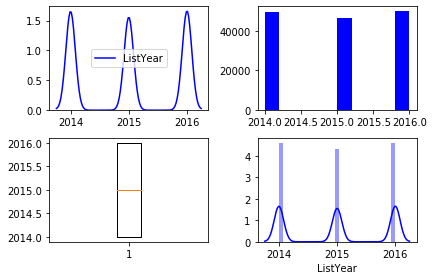

In [18]:
# Q6: Make three interesting plots using the data and describe what you see (40 points)
## Choose one variable (use ListYear) and make a four-panel plot with a density plot, histogram, a boxplot and an overlapping plot with histogram and density plot.
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

mer.ListYear = mer.ListYear.astype(object)

fig, axes = plt.subplots(2,2)

# density plot 
sns.kdeplot(mer['ListYear'],
            ax = axes[0,0],
            color='blue')

# histogram
axes[0,1].hist(x = mer.ListYear, color='blue')

# boxplot
axes[1,0].boxplot(mer.ListYear)

# overlapping plot
axes[1,1] = sns.distplot(mer['ListYear'], color='blue')

# add a tight layout
fig.tight_layout()

plt.show()

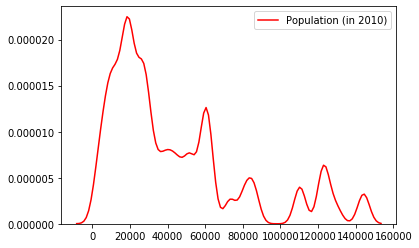

In [19]:
## Think of impressing your boss by telling a story from the data and build three interesting plots.
### density plot of the Population in 2010
sns.kdeplot(mer['Population (in 2010)'], color='red')

(array([26513., 26407., 12072.,  5847.,  2373., 29752., 17515., 20471.,
         3675.,  1362.]),
 array([1633. , 1661.8, 1690.6, 1719.4, 1748.2, 1777. , 1805.8, 1834.6,
        1863.4, 1892.2, 1921. ]),
 <a list of 10 Patch objects>)

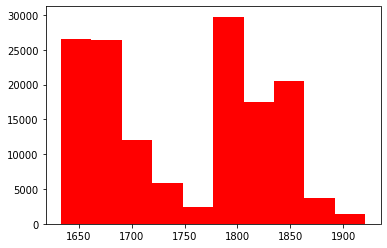

In [20]:
### histogram of the Established Year
plt.hist(mer['Established Year'], color='red')

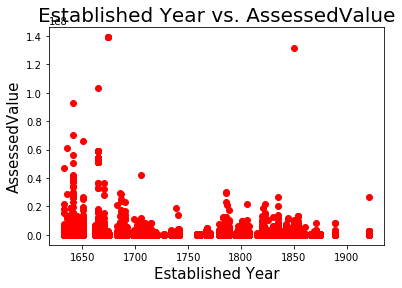

In [21]:
### scatterplot of the Established Year and the AssessedValue
fig, ax = plt.subplots()
ax.scatter(x=mer['Established Year'], y=mer['AssessedValue'], color='red')
ax.set_xlabel("Established Year", fontsize=15)
ax.set_ylabel("AssessedValue", fontsize=15)
ax.set_title("Established Year vs. AssessedValue", fontsize=20)

plt.show()

I created three plots to visualize the data, including the density plot of the Population in 2010, the histogram of the Established Year, and the scatterplot of the Established Year and the AssessedValue. First of all, from the density plot of Population in 2010 we can see that there is a majority of populations that are approximately 20000, while those that are about 100000 or 160000 have the least percentages. In terms of the histogram of the Established Year, it shows that the most records came from the end of 1700s to 1800, and there were two declining periods respectively from 1625 to approximately 1775, and from 1800 and 1925. Finally, the scatterplot of the Established Year and the AssessedValue illustrates that there is a weak correlation between these two variables. However, towns established around 1650 tend to have more properties with high assessed values than period after that.

In [22]:
# Q7: Aggregating, Multidimensional Tables (30 points)
## Generate a Frequency table based on the count of properties in each town.
## Table grouping based on one column.
mer.groupby(['Town', 'PropertyType']).size().reset_index(name='Count')

,Town,PropertyType,Count
0,Andover,Commercial,1
1,Andover,Residential,83
2,Andover,Vacant Land,13
3,Ansonia,Apartments,4
4,Ansonia,Commercial,27
...,...,...,...
675,Woodbury,Residential,548
676,Woodbury,Vacant Land,59
677,Woodstock,Commercial,5
678,Woodstock,Residential,300


In [23]:
## Create a multidimensional frequency table using the dataset based on Town, County and ListYear.
## Table grouping based on multiple columns.
mer.groupby(['Town', 'County', 'ListYear']).size().reset_index(name='Count')

,Town,County,ListYear,Count
0,Andover,Tolland County,2014,46
1,Andover,Tolland County,2015,51
2,Ansonia,New Haven County,2014,270
3,Ansonia,New Haven County,2015,271
4,Ansonia,New Haven County,2016,303
...,...,...,...,...
433,Woodbury,Litchfield County,2014,199
434,Woodbury,Litchfield County,2015,215
435,Woodbury,Litchfield County,2016,215
436,Woodstock,Windham County,2014,156


In [24]:
## Build a contingency table using the variable ‘Property Value’ based on the percentages of the row and an overall total of properties in each range.
mer['Property Value'].value_counts(normalize=True) * 100

LowRange     82.251159
MidRange     13.347764
HighRange     4.401077
Name: Property Value, dtype: float64

In [25]:
mer['Property Value'].value_counts()

LowRange     120076
MidRange      19486
HighRange      6425
Name: Property Value, dtype: int64

In [0]:
# Q8: Storytelling with Data (20 points)
## Tell a story based on your understanding and analysis of the data.

As for the merged dataframe with records from both the original list of towns and Real Estate Sales datasets, there are few relationships between each pair of the continuous variables. The ranges of the AssessedValue variable, the SaleAmount variable, and the SaleRatio variable are limited so that there are no particular trends for these variables to be used to predict the future. Neither did the records of the ListYear column have distinct variation. However, based on the three plots I made above, the density plot of the Population in 2010, the histogram of the Established Year, and the scatterplot of the Established Year and the AssessedValue, I got a few insight for these three categories. As for the Population in 2010, we can see that there is a majority of populations that are approximately 20000, while those that are about 100000 or 160000 have the least percentages. So the populations of these towns are mainly at a low level. In terms of the established year of the towns, most records came from the end of 1700s to 1800. And there were two declining periods respectively from 1625 to approximately 1775, and from 1800 and 1925. Maybe there are some historical causes resulting in it. At last, the scatterplot of the Established Year and the AssessedValue illustrates a weak relationship between these two variables. But towns established around 1650 tend to have more properties with high assessed values than period after that.